In [13]:
from keras.datasets import mnist

In [14]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [15]:
# getting the shape
x_test.shape

(10000, 28, 28)

In [16]:
y_test.shape

(10000,)

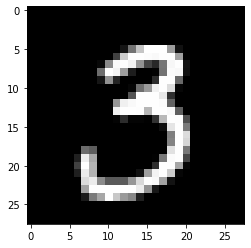

In [17]:
import matplotlib.pyplot as plt
plt.imshow(x_test[90],cmap='gray')

In [18]:
# lets verify the corresponding y_test
y_test[90]

3

In [25]:
x_test.shape
import numpy as np
x_test=np.reshape(x_test,(10000,784))

In [26]:
# # standardising the data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_test=scale.fit_transform(x_test)

# Method -1

In [27]:
from sklearn.decomposition import PCA
# no of components/new axis are 2
pca=PCA(n_components=2)
new_axis=pca.fit_transform(x_test)

In [45]:
new_axis.shape

(784, 2)

In [28]:
# lets look at the variances that we are able to retain
pca.explained_variance_
# it means that we are able to retain around 70 perceent information

array([41.39893397, 28.35105805])

# Method-2pca from scratch code

In [43]:
x_test.shape

(10000, 784)

In [44]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# step-1 calculaing covariance matrix
covar=np.dot(x_test.T,x_test)

In [31]:
# step-2 calculating the eigenvectors 
from numpy.linalg import svd
new_axis,S,V=svd(covar)

In [32]:
# now the new_axis is also of same shape as cov
# getting the 2 axis only
new_axis=new_axis[:,:2]
new_axis.shape

(784, 2)

In [33]:
# step-3 projecting the data on new axis
z=np.dot(x_test,new_axis)

In [39]:
# lets visualise our data 
import pandas as pd

data=np.hstack((z,y_test.reshape(-1,1)))

In [40]:
df=pd.DataFrame(data,columns=['pca1','pca2','target'])

In [41]:
df.head()

,pca1,pca2,target
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0
